# Crime Record Analyzer & Visualizer (India)

This project analyzes crime patterns in India using multiple publicly available datasets.  
It covers a range of themes including crimes against women, property-related offenses, and victim demographics. The objective is to uncover trends, assess recovery and conviction rates, and visualize the evolution of criminal activity across states and categories. The analysis employs Python for data processing, statistical modeling, forecasting, and interactive exploration.

## Features
- Trend analysis of property stolen and recovered over time
- Age and sex-based analysis of murder and rape victims
- Category-wise insights into crimes against women (e.g., Dowry, Assault, Harassment)
- State-wise case reporting and arrest patterns
- National recovery and conviction rate calculations
- Predictive modeling to forecast future crime patterns
- Interactive visualizations using dropdown filters
- Final summary of insights and actionable takeaways

Technologies used: Pandas, Matplotlib, Seaborn, Statsmodels, scikit-learn, IPyWidgets


## **1. Cases Against Women (India)**

The **Cases Against Women (India)** dataset provides annual records of crimes reported against women across various Indian states and union territories. It includes detailed statistics on multiple crime categories such as rape, dowry deaths, domestic cruelty, kidnapping, and others. This dataset enables the analysis of regional and temporal trends, offering insights into the safety and legal protection of women in different parts of India.

This project focuses on exploring, analyzing, and visualizing this dataset using Python. The goal is to identify key patterns, crime hotspots, and trends over time, and to present the findings through clear visual representations. The project also lays the groundwork for advanced extensions such as predictive analysis and interactive dashboards.


## Data Loading and Cleaning

This section includes importing required libraries, loading the dataset from CSV, checking for null values, and cleaning the column names for further analysis.


In [52]:
# Step 0: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for nicer plots
sns.set(style="whitegrid")

# Step 1: Load the dataset while skipping malformed rows
df = pd.read_csv('Cases_Women.csv', on_bad_lines='skip')

# Step 2: Preview first few rows
df.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Acquitted_or_Discharged,Cases_charge_sheets_were_not_laid_but_Final_Report_submitted,Cases_Chargesheeted,Cases_Compounded_or_Withdrawn,Cases_Convicted,Cases_Declared_False_on_Account_of_Mistake_of_Fact_or_of_Law,...,Cases_Pending_Investigation_at_Year_End,Cases_Pending_Investigation_from_previous_year,Cases_Pending_Trial_at_Year_End,Cases_Pending_Trial_from_the_previous_year,Cases_Reported,Cases_Sent_for_Trial,Cases_Trials_Completed,Cases_Withdrawn_by_the_Govt,Cases_withdrawn_by_the_Govt_during_investigation,Total_Cases_for_Trial
0,Andaman & Nicobar Islands,2001,Rape,01. Rape,5,2,3,0,0,0,...,1,3,34,36,3,3,5,0,0,39
1,Andhra Pradesh,2001,Rape,01. Rape,731,22,769,35,197,74,...,393,390,1974,2170,871,769,928,2,0,2937
2,Arunachal Pradesh,2001,Rape,01. Rape,1,2,25,0,2,0,...,18,12,282,260,33,25,3,0,0,285
3,Assam,2001,Rape,01. Rape,334,95,495,10,101,45,...,1045,863,1964,1914,817,495,435,0,0,2409
4,Bihar,2001,Rape,01. Rape,406,141,685,0,155,105,...,488,531,3185,3061,888,685,561,0,0,3746


In [53]:
# Shape of the dataset
print("Shape of dataset:", df.shape)

# Info about data types and nulls
df.info()

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

Shape of dataset: (2765, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2765 entries, 0 to 2764
Data columns (total 22 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   Area_Name                                                     2765 non-null   object
 1   Year                                                          2765 non-null   int64 
 2   Group_Name                                                    2765 non-null   object
 3   Sub_Group_Name                                                2765 non-null   object
 4   Cases_Acquitted_or_Discharged                                 2765 non-null   int64 
 5   Cases_charge_sheets_were_not_laid_but_Final_Report_submitted  2765 non-null   int64 
 6   Cases_Chargesheeted                                           2765 non-null   int64 
 7   Cases_Compounded_or_Withdrawn                    

In [54]:
# Clean and simplify column names
df.columns = df.columns.str.strip().str.replace('\n', ' ').str.replace(' ', '_').str.lower()

# Show new column names
print("Cleaned column names:")
print(df.columns.tolist())

Cleaned column names:
['area_name', 'year', 'group_name', 'sub_group_name', 'cases_acquitted_or_discharged', 'cases_charge_sheets_were_not_laid_but_final_report_submitted', 'cases_chargesheeted', 'cases_compounded_or_withdrawn', 'cases_convicted', 'cases_declared_false_on_account_of_mistake_of_fact_or_of_law', 'cases_investigated_chargesheets+fr_submitted', 'cases_not_investigated_or_in_which_investigation_was_refused', 'cases_pending_investigation_at_year_end', 'cases_pending_investigation_from_previous_year', 'cases_pending_trial_at_year_end', 'cases_pending_trial_from_the_previous_year', 'cases_reported', 'cases_sent_for_trial', 'cases_trials_completed', 'cases_withdrawn_by_the_govt', 'cases_withdrawn_by_the_govt_during_investigation', 'total_cases_for_trial']


## National-Level Crime and Conviction Trends

Explore the overall trend of crimes reported and convictions recorded against women in India over time.  
Visualizations include line plots for total crimes, convictions, and average conviction rate by year.

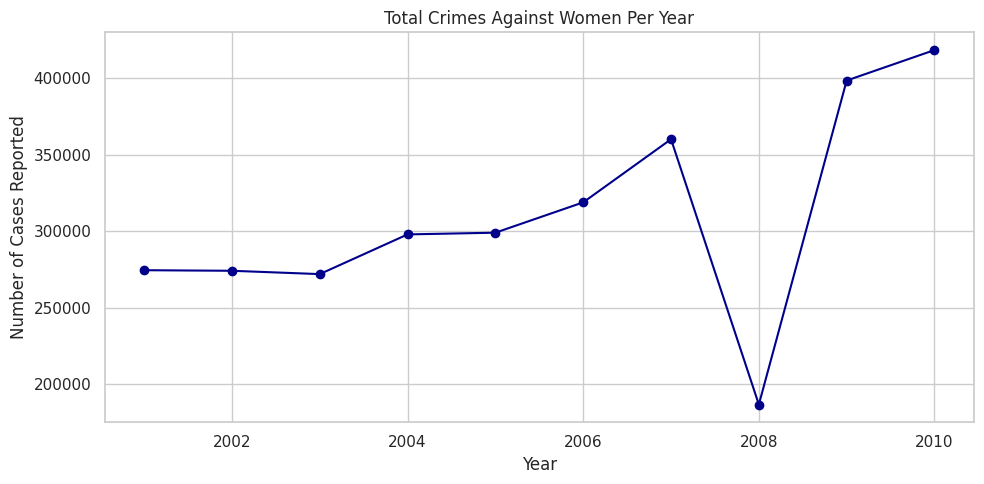

In [55]:
# Total crimes reported per year
yearly_crimes = df.groupby('year')['cases_reported'].sum()

# Plot
plt.figure(figsize=(10, 5))
yearly_crimes.plot(kind='line', marker='o', color='darkblue')
plt.title('Total Crimes Against Women Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Cases Reported')
plt.grid(True)
plt.tight_layout()
plt.show()

## Top States and Crime Categories

Identify the states with the highest number of reported crimes in the most recent year.  
Also visualize the top crime categories (group-level) based on the total number of cases reported.


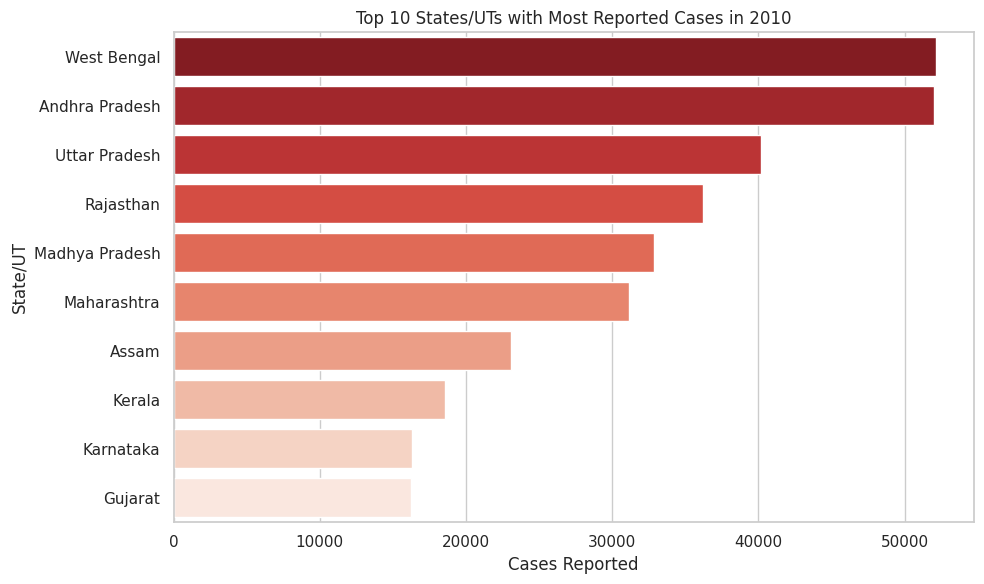

In [56]:
# Find latest year
latest_year = df['year'].max()

# Filter rows for latest year and get top 10 states by cases reported
top_states = (
    df[df['year'] == latest_year]
    .groupby('area_name')['cases_reported']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.values, y=top_states.index, palette='Reds_r')
plt.title(f'Top 10 States/UTs with Most Reported Cases in {latest_year}')
plt.xlabel('Cases Reported')
plt.ylabel('State/UT')
plt.tight_layout()
plt.show()

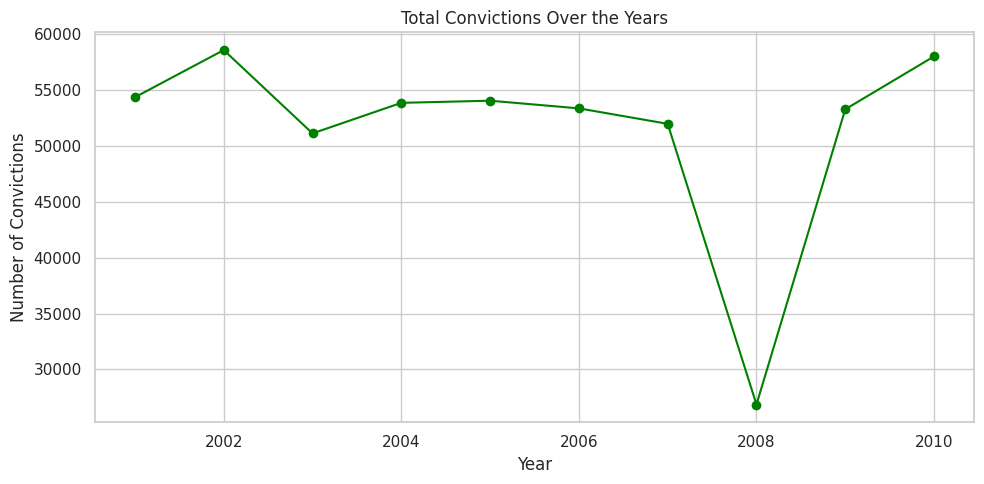

In [57]:
# Group by year for convictions
conviction_trend = df.groupby('year')['cases_convicted'].sum()

# Plot
plt.figure(figsize=(10, 5))
conviction_trend.plot(kind='line', marker='o', color='green')
plt.title('Total Convictions Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Convictions')
plt.grid(True)
plt.tight_layout()
plt.show()

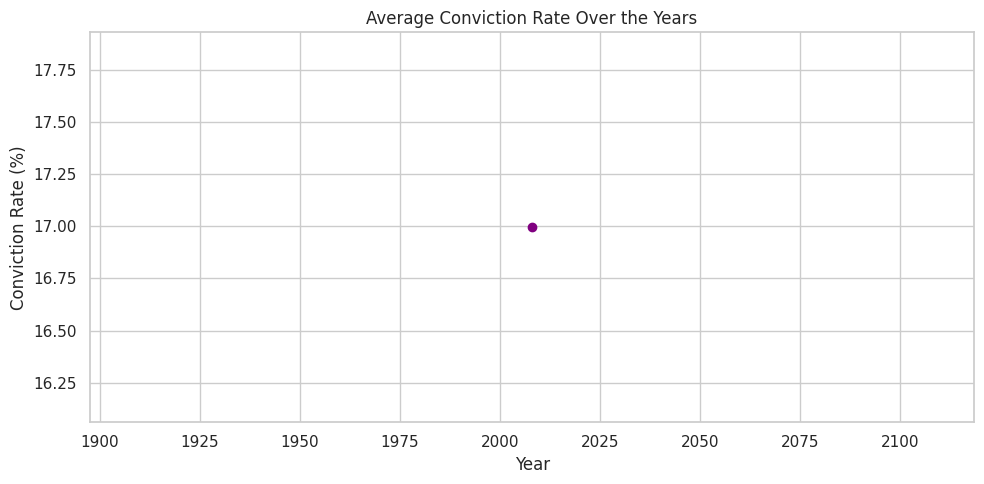

In [58]:
# Conviction Rate = Convicted / Reported
df['conviction_rate'] = (df['cases_convicted'] / df['cases_reported']) * 100

# Average conviction rate by year
yearly_conviction_rate = df.groupby('year')['conviction_rate'].mean()

# Plot
plt.figure(figsize=(10, 5))
yearly_conviction_rate.plot(kind='line', marker='o', color='purple')
plt.title('Average Conviction Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Conviction Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-59-2150819314.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crime_types.values, y=top_crime_types.index, palette='Blues_d')


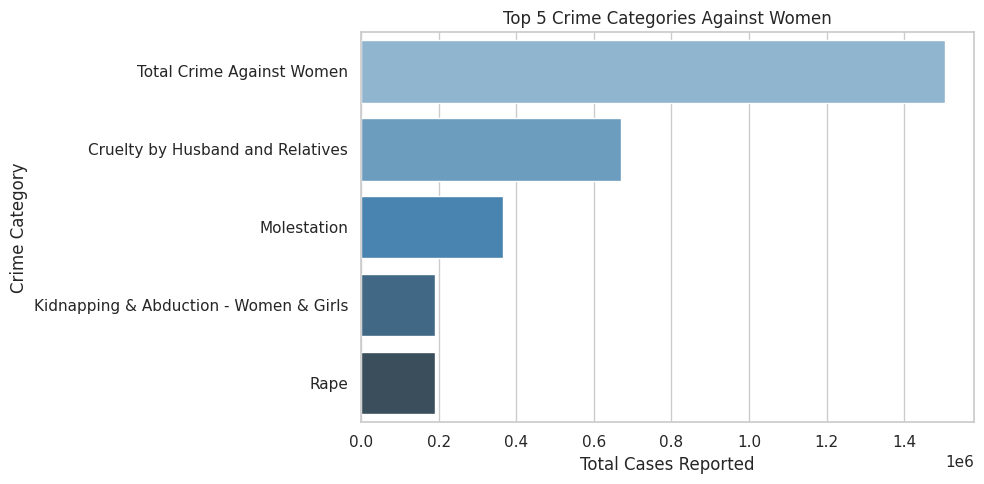

In [59]:
# Group by group_name and get top 5 based on total cases reported
top_crime_types = df.groupby('group_name')['cases_reported'].sum().sort_values(ascending=False).head(5)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=top_crime_types.values, y=top_crime_types.index, palette='Blues_d')
plt.title('Top 5 Crime Categories Against Women')
plt.xlabel('Total Cases Reported')
plt.ylabel('Crime Category')
plt.tight_layout()
plt.show()

## Subgroup-Level Crime Trends

Analyze trends over time for the top 5 most frequently reported crime subgroups.  
This helps in understanding which specific types of crimes are increasing or decreasing over the years.

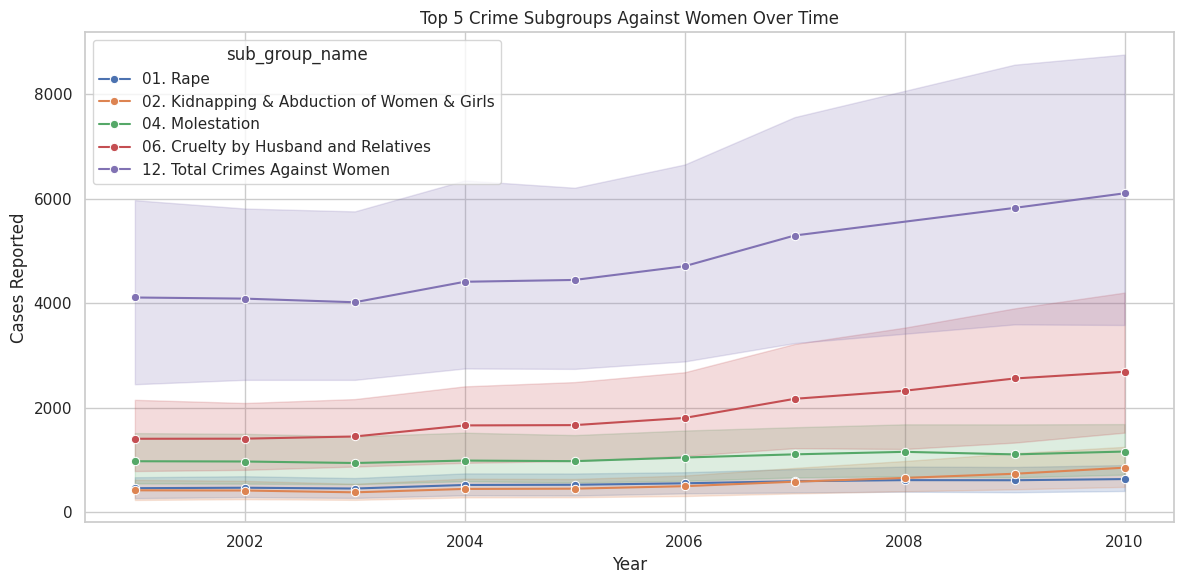

In [60]:
# Top 5 most common subgroups by total reported cases
top_subgroups = df.groupby('sub_group_name')['cases_reported'].sum().sort_values(ascending=False).head(5).index
subset = df[df['sub_group_name'].isin(top_subgroups)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=subset, x='year', y='cases_reported', hue='sub_group_name', marker='o')
plt.title('Top 5 Crime Subgroups Against Women Over Time')
plt.xlabel('Year')
plt.ylabel('Cases Reported')
plt.grid(True)
plt.tight_layout()
plt.show()


## State-wise Conviction Rate Heatmap

Visual comparison of average conviction rates across Indian states.  
A heatmap helps identify regions with consistently high or low conviction efficiency.

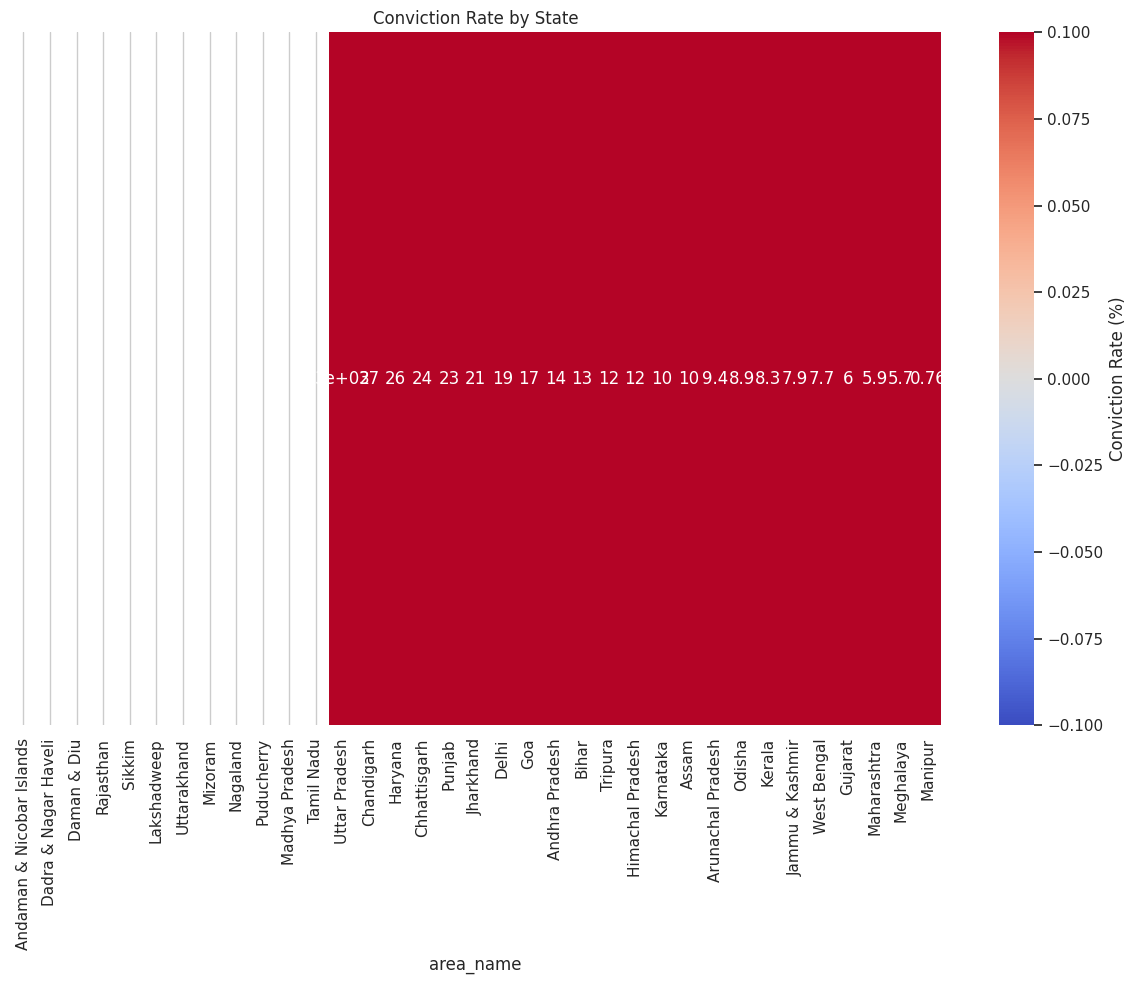

In [61]:
# Average conviction rate per state
state_conviction = df.groupby('area_name')['conviction_rate'].mean().sort_values(ascending=False)

# Plot top & bottom states on heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(state_conviction.to_frame().T, cmap='coolwarm', annot=True, cbar_kws={'label': 'Conviction Rate (%)'})
plt.title('Conviction Rate by State')
plt.yticks([])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Time-Series Trend Decomposition

Apply seasonal decomposition to the national-level crime data to break down the trend into three components:
- Trend: Long-term progression
- Seasonal: Repeating patterns
- Residual: Irregularities or noise

/tmp/ipython-input-62-3076372009.py:9: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ts = pd.Series(yearly.values, index=pd.date_range(start='1/1/2001', periods=len(yearly), freq='Y'))


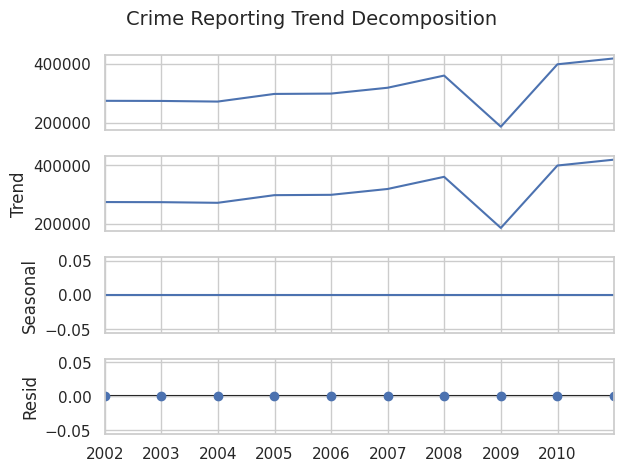

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt

# Use national yearly trend of reported cases
yearly = df.groupby('year')['cases_reported'].sum()

# Convert to time series (with a dummy date index)
ts = pd.Series(yearly.values, index=pd.date_range(start='1/1/2001', periods=len(yearly), freq='Y'))

result = seasonal_decompose(ts, model='additive', period=1)

# Plot
result.plot()
plt.suptitle('Crime Reporting Trend Decomposition', fontsize=14)
plt.tight_layout()
plt.tight_layout()
plt.show()


## Forecasting Crime Cases Using Linear Regression

Use a simple linear regression model to predict the number of crimes that may be reported in the upcoming year based on historical national trends.


In [63]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data: use year values directly from the index
X = np.array(yearly.index).reshape(-1, 1)
y = yearly.values

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predict for next year
next_year = X[-1][0] + 1
prediction = model.predict([[next_year]])

print(f"🔮 Predicted total crimes in {next_year}: {int(prediction[0])}")

🔮 Predicted total crimes in 2011: 375001


## Interactive Analysis by State and Subgroup

Use dropdown filters to select a state and a crime subgroup.  
The line chart will show the trend of that specific crime in the selected region over the years.

In [64]:
import ipywidgets as widgets
from IPython.display import display

# Dropdown for state & subgroup
state_dropdown = widgets.Dropdown(options=df['area_name'].unique(), description='State:')
subgroup_dropdown = widgets.Dropdown(options=df['sub_group_name'].unique(), description='Subgroup:')

display(state_dropdown, subgroup_dropdown)

def plot_filtered(state, subgroup):
    filtered = df[(df['area_name'] == state) & (df['sub_group_name'] == subgroup)]
    trend = filtered.groupby('year')['cases_reported'].sum()

    plt.figure(figsize=(10, 4))
    trend.plot(kind='line', marker='o', title=f'{subgroup} Cases in {state}')
    plt.ylabel('Cases Reported')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Link interactivity
widgets.interactive(plot_filtered, state=state_dropdown, subgroup=subgroup_dropdown)

Dropdown(description='State:', options=('Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'A…

Dropdown(description='Subgroup:', options=('01. Rape', '02. Kidnapping & Abduction of Women & Girls', '03. Dow…

interactive(children=(Dropdown(description='State:', options=('Andaman & Nicobar Islands', 'Andhra Pradesh', '…

## Summary of Key Insights

This section presents an automatically generated summary of important statistics extracted from the dataset.  
It highlights the most common crime type, the state with the highest case count, and the region with the best conviction rate.

In [65]:
print("📌 Key Insights Summary:\n")
print(f"🗓️ Years Covered: {df['year'].min()} - {df['year'].max()}")
print(f"📍 Total States: {df['area_name'].nunique()}")
print(f"📊 Most Reported Crime Type: {df.groupby('sub_group_name')['cases_reported'].sum().idxmax()}")
print(f"🚨 State with Highest Total Cases: {df.groupby('area_name')['cases_reported'].sum().idxmax()}")
print(f"✅ State with Highest Conviction Rate: {df.groupby('area_name')['conviction_rate'].mean().idxmax()}")


📌 Key Insights Summary:

🗓️ Years Covered: 2001 - 2010
📍 Total States: 35
📊 Most Reported Crime Type: 12. Total Crimes Against Women
🚨 State with Highest Total Cases: Andhra Pradesh
✅ State with Highest Conviction Rate: Andaman & Nicobar Islands


#  **2. Analysis of Arrests Under Crimes Against Women(India)**


This section explores arrest trends across Indian states and crime categories based on the arrests dataset. It includes time-series visualizations, top subgroup analysis, and state-level comparisons to uncover how legal action has progressed across different years.


In [66]:
# Load the arrests dataset
arrests_df = pd.read_csv('Arrests_crime_against_women.csv', on_bad_lines='skip')

# Preview first few rows
arrests_df.head()


,Area_Name,Year,Group_Name,Sub_Group_Name,Persons_Acquitted,Persons_against_whom_cases_Compounded_or_Withdrawn,Persons_Arrested,Persons_Chargesheeted,Persons_Convicted,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_beginning,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_end,Persons_in_Custody_or_on_Bail_during_Trial_at_Year_End,Persons_Released_or_Freed_by_Police_or_Magistrate_before_Trial_for_want_of_evidence_or_any_other_reason,Persons_Trial_Completed,Persons_under_Trial_at_Year_beginning,Total_Persons_under_Trial
0,Andaman & Nicobar Islands,2001,Rape,01. Rape,6,0,3,3,0,6,6,45,0,6,48,51
1,Andhra Pradesh,2001,Rape,01. Rape,1168,13,1150,1021,246,450,545,2191,34,1414,2597,3618
2,Arunachal Pradesh,2001,Rape,01. Rape,1,0,51,31,2,25,30,347,15,3,319,350
3,Assam,2001,Rape,01. Rape,403,14,928,585,120,806,959,2331,190,523,2283,2868
4,Bihar,2001,Rape,01. Rape,756,0,1400,1302,217,719,576,5963,241,973,5634,6936


###  Dataset Overview
We inspect the structure of the dataset, check for missing values, and prepare the column names for analysis.


In [67]:
# Basic structure
print("Shape of dataset:", arrests_df.shape)
arrests_df.info()

# Missing values
print("\nMissing values:")
print(arrests_df.isnull().sum())

# Clean column names
arrests_df.columns = arrests_df.columns.str.strip().str.replace('\n', ' ').str.replace(' ', '_').str.lower()
print("Cleaned column names:", arrests_df.columns.tolist())


Shape of dataset: (2765, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2765 entries, 0 to 2764
Data columns (total 16 columns):
 #   Column                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                   --------------  ----- 
 0   Area_Name                                                                                                2765 non-null   object
 1   Year                                                                                                     2765 non-null   int64 
 2   Group_Name                                                                                               2765 non-null   object
 3   Sub_Group_Name                                                                                           2765 non-null   object
 4   Persons_Acquitted                                            

### Year-wise Trend of Total Arrests
We analyze the yearly progression of arrests made under crimes against women using the `persons_arrested` column.



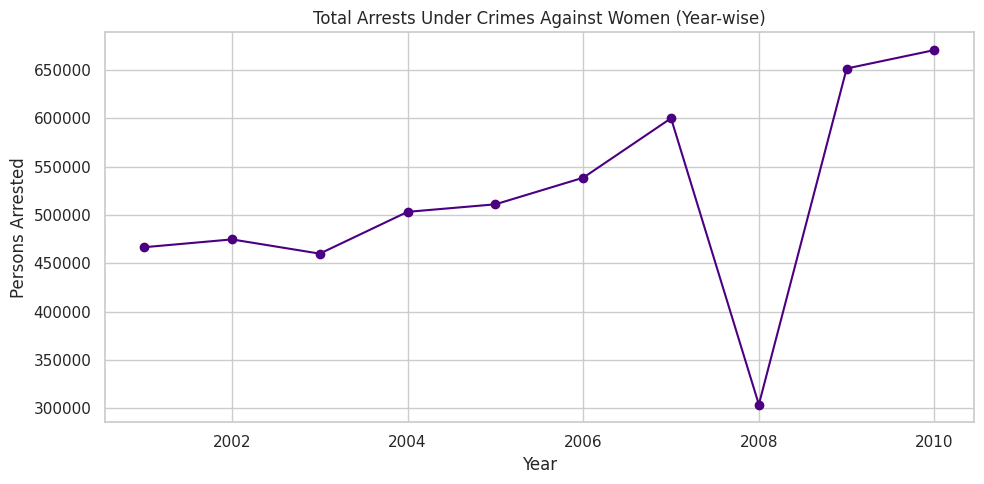

In [68]:
# Total arrests by year using the correct column name
yearly_arrests = arrests_df.groupby('year')['persons_arrested'].sum()

plt.figure(figsize=(10, 5))
yearly_arrests.plot(kind='line', marker='o', color='indigo')
plt.title('Total Arrests Under Crimes Against Women (Year-wise)')
plt.xlabel('Year')
plt.ylabel('Persons Arrested')
plt.grid(True)
plt.tight_layout()
plt.show()



###  Top 10 States by Arrests (Latest Year)
We identify the top Indian states with the highest number of persons arrested in the most recent year available in the dataset.


/tmp/ipython-input-69-1932055448.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states_arrests.values, y=top_states_arrests.index, palette='mako')


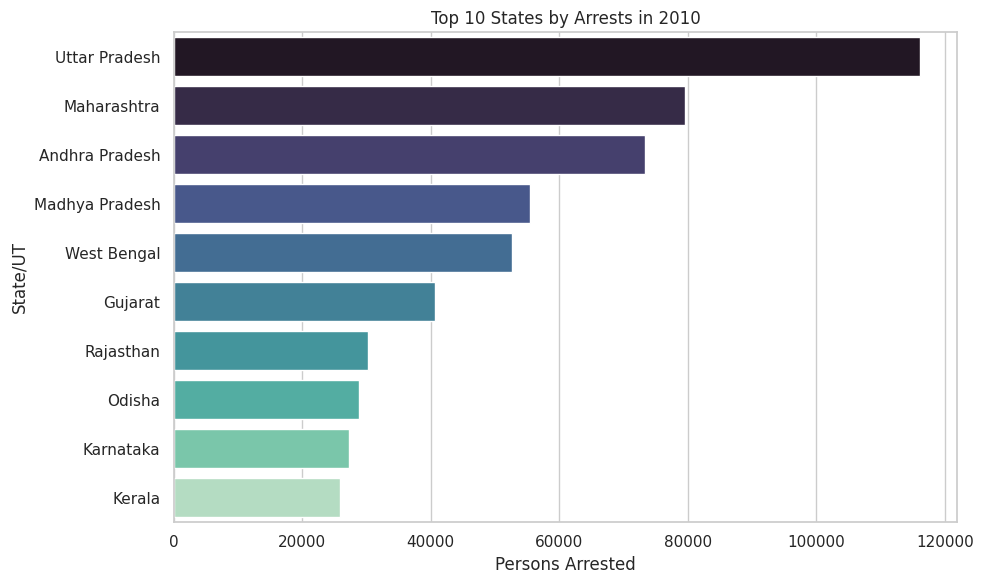

In [69]:
latest_year_arrests = arrests_df['year'].max()

top_states_arrests = (
    arrests_df[arrests_df['year'] == latest_year_arrests]
    .groupby('area_name')['persons_arrested']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_states_arrests.values, y=top_states_arrests.index, palette='mako')
plt.title(f'Top 10 States by Arrests in {latest_year_arrests}')
plt.xlabel('Persons Arrested')
plt.ylabel('State/UT')
plt.tight_layout()
plt.show()


### Most Arrested Crime Subgroups
This section analyzes which subcategories of crimes against women have led to the highest number of arrests. By grouping the data by `sub_group_name`, we can identify recurring areas where enforcement has been most active and visualize how arrests in these subgroups have changed over the years.


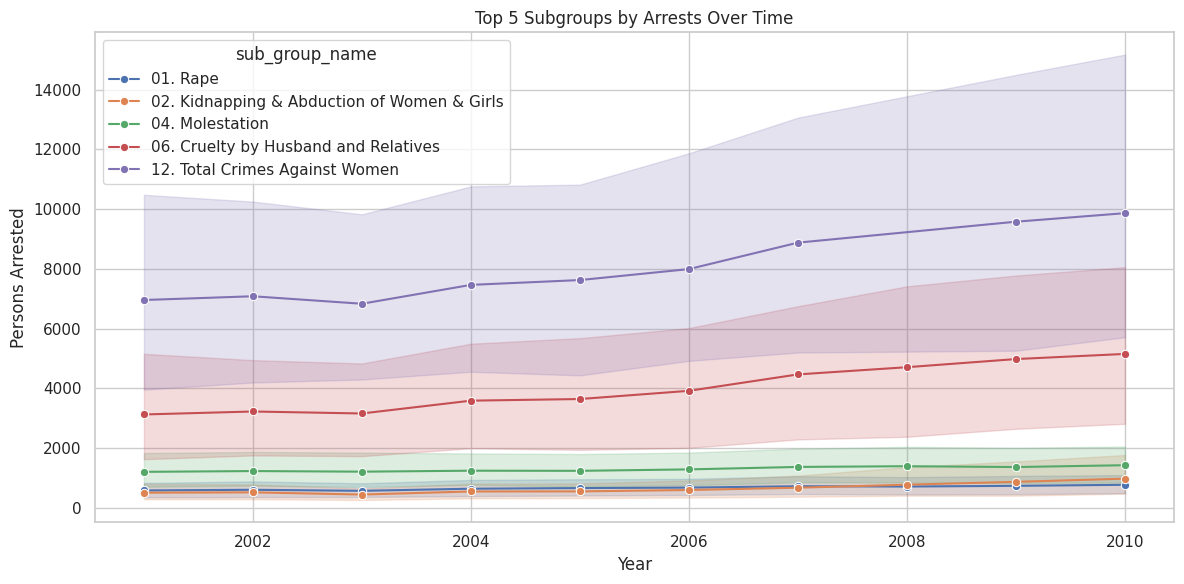

In [70]:
top_subgroups = arrests_df.groupby('sub_group_name')['persons_arrested'].sum().sort_values(ascending=False).head(5).index
subset = arrests_df[arrests_df['sub_group_name'].isin(top_subgroups)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=subset, x='year', y='persons_arrested', hue='sub_group_name', marker='o')
plt.title('Top 5 Subgroups by Arrests Over Time')
plt.xlabel('Year')
plt.ylabel('Persons Arrested')
plt.grid(True)
plt.tight_layout()
plt.show()


### State-wise Average Arrests (All Years)
To understand geographical variations in enforcement, we compute the average number of persons arrested per state across all available years. This heatmap visualization helps highlight which regions have reported consistently high or low arrest volumes under crimes against women.


/tmp/ipython-input-71-3762319265.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


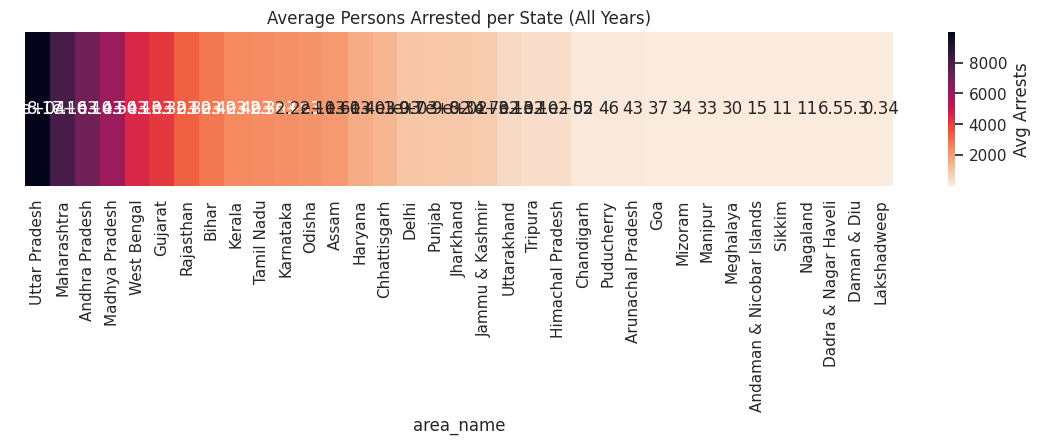

In [71]:
state_avg_arrests = arrests_df.groupby('area_name')['persons_arrested'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 2))
sns.heatmap(state_avg_arrests.to_frame().T, cmap='rocket_r', annot=True, cbar_kws={'label': 'Avg Arrests'})
plt.title('Average Persons Arrested per State (All Years)')
plt.yticks([])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Summary of Arrests Dataset Analysis

This section explores arrest-related statistics under crimes against women in India, based on data from official sources. The analysis focused on identifying yearly trends, regional patterns, and enforcement distribution.

- **Time Coverage:** The dataset spans multiple years, enabling the study of temporal arrest trends.
- **Arrest Trends:** Arrests show year-to-year variation, suggesting influences such as legal reforms, awareness campaigns, or changes in enforcement practices.
- **State-wise Distribution:** States like Uttar Pradesh and Maharashtra report consistently higher arrest counts, potentially due to larger populations, higher crime incidence, or more rigorous policing.
- **Subgroup Analysis:** Subcategories such as "Cruelty by Husband or Relatives" dominate the arrest statistics, pointing to persistent societal issues that need systemic attention.
- **Geographical Heatmap:** A heatmap visualization of average arrests per state helps identify enforcement intensity and disparities across regions.

This dataset complements the case statistics and offers insights into the response of law enforcement across time, crime categories, and states.


# **3.Murder Victim Analysis by Age and Gender (India)**

This notebook explores and analyzes detailed records of murder victims across India, segmented by **age** and **gender** over multiple years and regions. The dataset provides insight into:

- Age-specific vulnerability to murder
- Trends in murder cases across different states and years
- Comparative analysis of age groups: children, youth, middle-aged, and elderly
- Detection of systemic patterns using demographic segmentation

The primary goals of this analysis are to:
- Understand which age groups are most at risk
- Examine state-wise and national-level changes over time
- Assist policymakers and law enforcement with data-backed insights on homicide trends

The analysis includes descriptive statistics, trend visualizations, and advanced demographic breakdowns.


## Data Loading & Preview

We begin by importing the murder victim dataset. This step loads the data and displays its structure, helping us understand the columns and their significance.


In [72]:
# Import essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn theme
sns.set(style="whitegrid")

# Load dataset
df_murder = pd.read_csv("Murder_victim_age_sex.csv")

# Preview
df_murder.head()


,Area_Name,Year,Group_Name,Sub_Group_Name,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
0,Andaman & Nicobar Islands,2001,Murder - Female Victims,2. Female Victims,NaN,6,NaN,NaN,NaN,4.0,2.0
1,Andhra Pradesh,2001,Murder - Female Victims,2. Female Victims,67.0,607,15.0,38.0,43.0,269.0,175.0
2,Arunachal Pradesh,2001,Murder - Female Victims,2. Female Victims,2.0,16,0.0,0.0,0.0,10.0,4.0
3,Assam,2001,Murder - Female Victims,2. Female Victims,11.0,128,8.0,4.0,23.0,45.0,37.0
4,Bihar,2001,Murder - Female Victims,2. Female Victims,12.0,366,0.0,0.0,40.0,191.0,123.0


## Data Cleaning & Inspection

We inspect the dataset for missing values, column types, and inconsistent naming. Column names are cleaned to ensure smooth downstream analysis.
**bold text**

In [73]:
# Check shape and data types
print("Shape of dataset:", df_murder.shape)
df_murder.info()

# Missing values
print("\nMissing values per column:")
print(df_murder.isnull().sum())

# Clean column names
df_murder.columns = df_murder.columns.str.strip().str.replace(' ', '_').str.lower()
print("\nCleaned column names:")
print(df_murder.columns.tolist())


Shape of dataset: (1018, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area_Name               1018 non-null   object 
 1   Year                    1018 non-null   int64  
 2   Group_Name              1018 non-null   object 
 3   Sub_Group_Name          1018 non-null   object 
 4   Victims_Above_50_Yrs    962 non-null    float64
 5   Victims_Total           1018 non-null   int64  
 6   Victims_Upto_10_15_Yrs  876 non-null    float64
 7   Victims_Upto_10_Yrs     900 non-null    float64
 8   Victims_Upto_15_18_Yrs  888 non-null    float64
 9   Victims_Upto_18_30_Yrs  1009 non-null   float64
 10  Victims_Upto_30_50_Yrs  1007 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 87.6+ KB

Missing values per column:
Area_Name                   0
Year                        0
Group_Name              

## Year-wise Total Victims by Gender

This section compares the number of male and female murder victims reported each year across India.


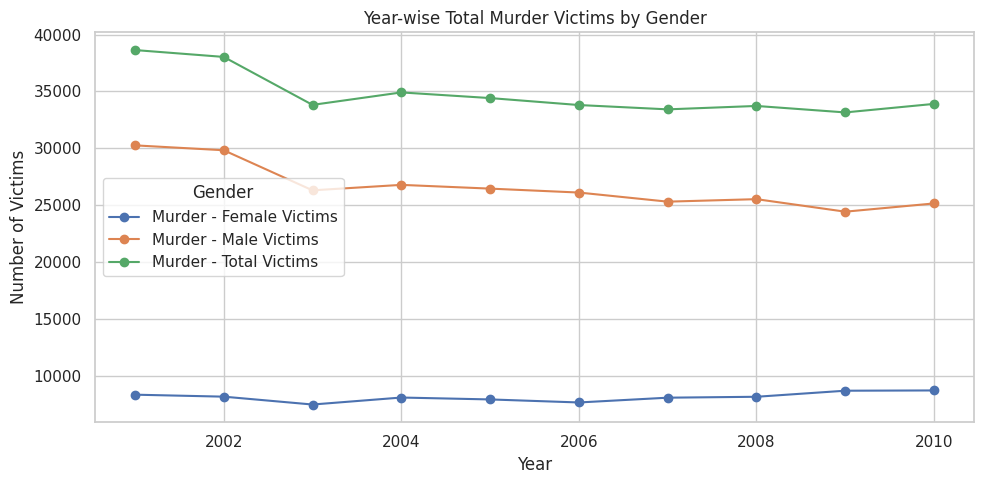

In [74]:
# Aggregate victims by year and gender
victims_by_gender = (
    df_murder.groupby(['year', 'group_name'])['victims_total']
    .sum()
    .unstack()
)

# Plot
victims_by_gender.plot(marker='o', figsize=(10, 5))
plt.title("Year-wise Total Murder Victims by Gender")
plt.xlabel("Year")
plt.ylabel("Number of Victims")
plt.legend(title="Gender")
plt.grid(True)
plt.tight_layout()
plt.show()


## Victim Age Group Distribution (All Years)

We analyze which age groups are most affected by murder incidents across India, combining all years and states.


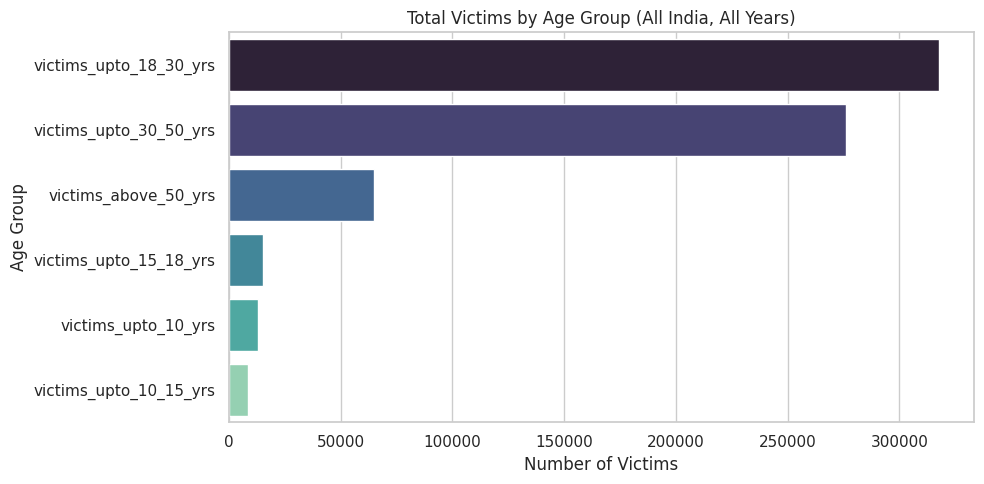

In [75]:
# Select available age-related columns (reordered logically)
age_cols = [
    'victims_upto_10_yrs',
    'victims_upto_10_15_yrs',
    'victims_upto_15_18_yrs',
    'victims_upto_18_30_yrs',
    'victims_upto_30_50_yrs',
    'victims_above_50_yrs'
]

# Total victims by age group
age_group_totals = df_murder[age_cols].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=age_group_totals.values, y=age_group_totals.index, palette='mako')
plt.title("Total Victims by Age Group (All India, All Years)")
plt.xlabel("Number of Victims")
plt.ylabel("Age Group")
plt.tight_layout()
plt.show()


## Average Victims by State (All Years)

To identify which states consistently report high numbers of murder victims, we calculate average victims per year for each state.


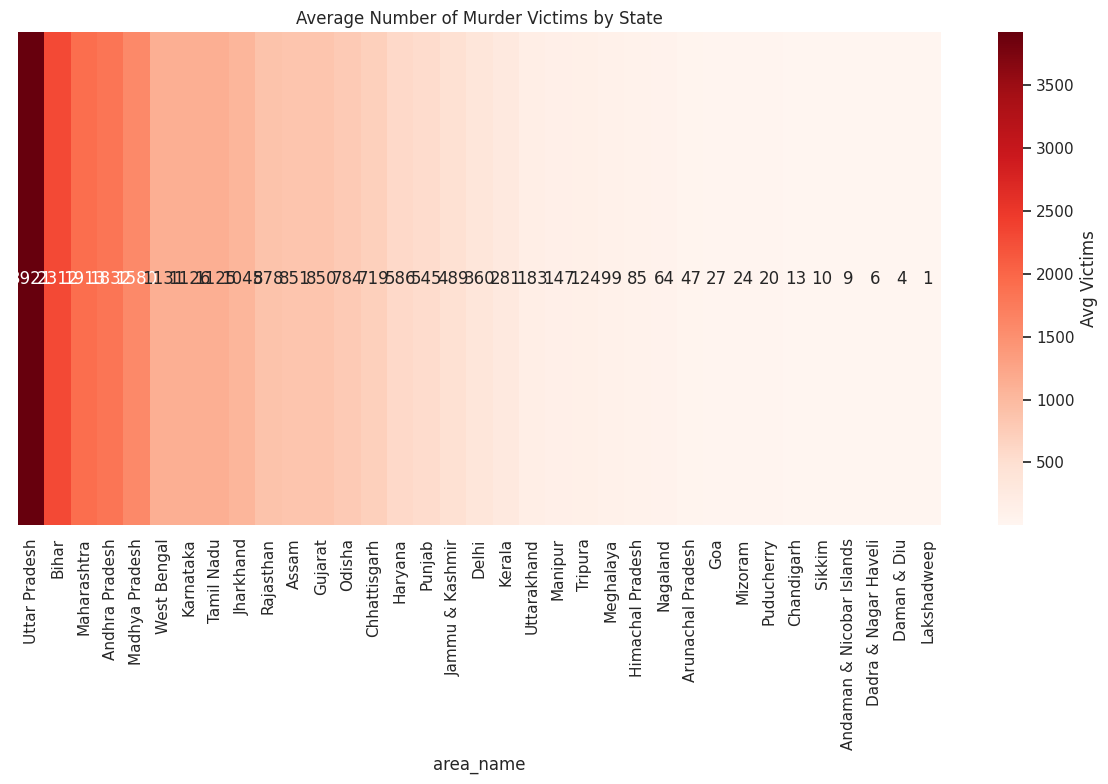

In [76]:
# Average victims by state
state_avg_victims = df_murder.groupby('area_name')['victims_total'].mean().sort_values(ascending=False)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(state_avg_victims.to_frame().T, cmap='Reds', annot=True, fmt='.0f', cbar_kws={'label': 'Avg Victims'})
plt.title("Average Number of Murder Victims by State")
plt.xticks(rotation=90)
plt.yticks([])
plt.tight_layout()
plt.show()


## Interactive Victim Trend by State & Gender

This interactive plot lets users explore murder victim trends for specific states, broken down by gender.


In [77]:
import ipywidgets as widgets
from IPython.display import display

# Dropdowns
state_dropdown = widgets.Dropdown(options=df_murder['area_name'].unique(), description='State:')
display(state_dropdown)

def plot_victim_trend(state):
    subset = df_murder[df_murder['area_name'] == state]
    trend = subset.groupby(['year', 'group_name'])['victims_total'].sum().unstack()
    trend.plot(marker='o', figsize=(10, 4))
    plt.title(f"Murder Victims in {state} by Gender Over Time")
    plt.xlabel("Year")
    plt.ylabel("Number of Victims")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

widgets.interactive(plot_victim_trend, state=state_dropdown)


Dropdown(description='State:', options=('Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'A…

interactive(children=(Dropdown(description='State:', options=('Andaman & Nicobar Islands', 'Andhra Pradesh', '…

## Summary of Murder Victim Demographics Analysis

This section explored patterns in murder victim demographics across India, focusing on age and gender distribution.

- **Victim Age Group Distribution:** Identified the most affected age groups nationally.
- **Gender Trends:** Female and male victims were analyzed year by year.
- **State-wise Insights:** Highlighted states with the highest average victim counts.
- **Interactive Exploration:** Enabled dynamic selection of states for customized trend views.

These insights help reveal regional and demographic vulnerabilities in murder crimes across India.


# **4. Rape Victim Data Analysis in India**

This notebook performs a detailed data analysis of rape victim statistics across Indian states and union territories. The dataset includes segmentation by victim age group, year, and type of rape (incest vs. other), making it possible to uncover patterns, vulnerable demographics, and regional trends.

We explore:

- National and regional trends over time
- Vulnerability by age group
- Incest vs. other rape trends
- Most affected states
- Volatility in crime reporting
- Correlation patterns and temporal decomposition

The goal is to derive actionable insights for researchers, policy-makers, and public safety planners through statistical summaries and visualizations.


## Data Loading & Preview

This section loads the dataset containing rape victim statistics across Indian states and UTs, segmented by year, type of rape, and victim age group.


In [78]:
# Load dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df_rape = pd.read_csv("Victims_of_rape.csv")
df_rape.head()


,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0


## Data Inspection & Cleaning

We inspect the dataset for structure, missing values, and standardize column names for smooth analysis.


In [79]:
# Data shape and info
print("Shape:", df_rape.shape)
df_rape.info()

# Missing values
print("\nMissing values per column:")
print(df_rape.isnull().sum())

# Clean column names
df_rape.columns = df_rape.columns.str.strip().str.lower().str.replace(' ', '_')
print("\nCleaned column names:")
print(df_rape.columns.tolist())


Shape: (1050, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Area_Name                  1050 non-null   object
 1   Year                       1050 non-null   int64 
 2   Subgroup                   1050 non-null   object
 3   Rape_Cases_Reported        1050 non-null   int64 
 4   Victims_Above_50_Yrs       1050 non-null   int64 
 5   Victims_Between_10-14_Yrs  1050 non-null   int64 
 6   Victims_Between_14-18_Yrs  1050 non-null   int64 
 7   Victims_Between_18-30_Yrs  1050 non-null   int64 
 8   Victims_Between_30-50_Yrs  1050 non-null   int64 
 9   Victims_of_Rape_Total      1050 non-null   int64 
 10  Victims_Upto_10_Yrs        1050 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 90.4+ KB

Missing values per column:
Area_Name                    0
Year                         0
Subgroup           

## Total Rape Victims Reported Over Time

This visualization shows the total number of rape victims reported across India each year. It helps identify long-term trends and patterns in reporting.


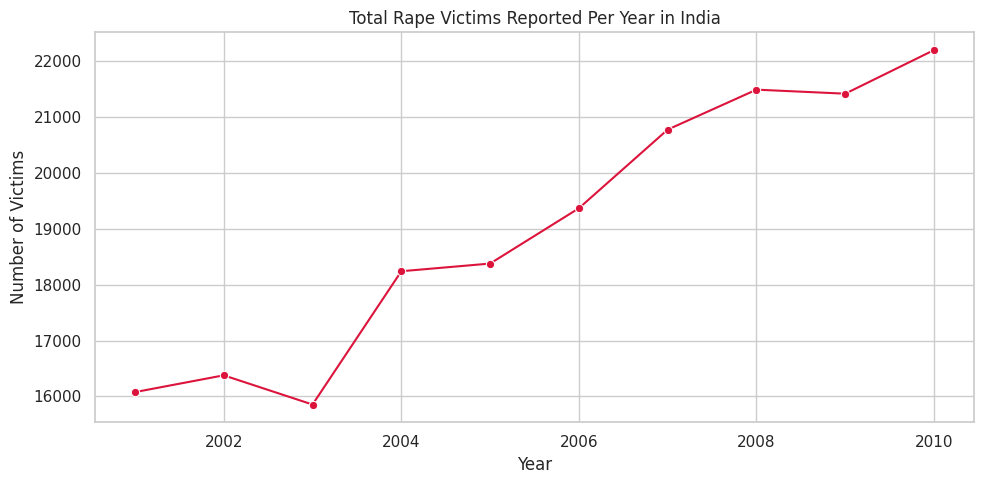

In [80]:
# Filter for only total rape victim rows
rape_total = df_rape[df_rape['subgroup'] == 'Total Rape Victims']

# Group by year
total_by_year = rape_total.groupby('year')['victims_of_rape_total'].sum()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=total_by_year.index, y=total_by_year.values, marker='o', color='crimson')
plt.title("Total Rape Victims Reported Per Year in India")
plt.xlabel("Year")
plt.ylabel("Number of Victims")
plt.grid(True)
plt.tight_layout()
plt.show()


## Age Distribution of Rape Victims

We analyze the cumulative number of victims in each age group across all years to determine which age demographics are most vulnerable.


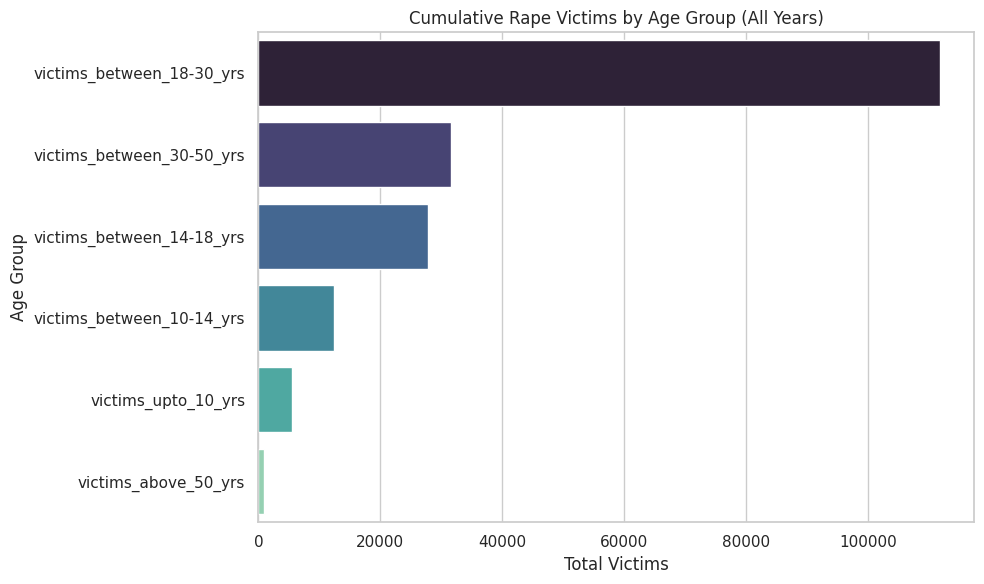

In [81]:
# Define age-related columns
age_columns = [
    'victims_upto_10_yrs', 'victims_between_10-14_yrs', 'victims_between_14-18_yrs',
    'victims_between_18-30_yrs', 'victims_between_30-50_yrs', 'victims_above_50_yrs'
]

# Sum total victims by age group
age_distribution = rape_total[age_columns].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=age_distribution.values, y=age_distribution.index, palette='mako')
plt.title("Cumulative Rape Victims by Age Group (All Years)")
plt.xlabel("Total Victims")
plt.ylabel("Age Group")
plt.tight_layout()
plt.show()


## Top 10 States by Reported Rape Cases (Latest Year)

This section shows the states with the highest number of rape victims in the most recent year.


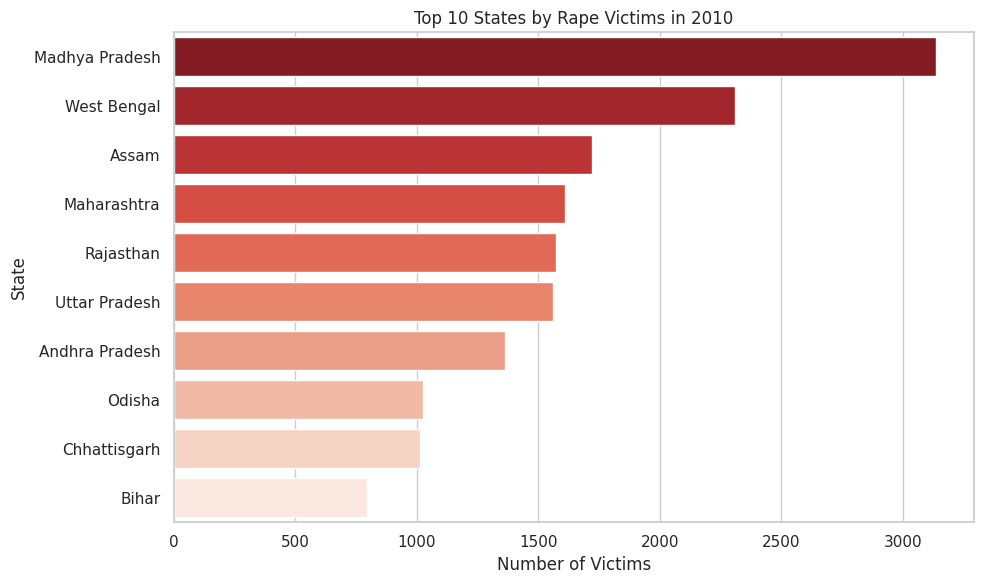

In [82]:
# Latest year
latest_year = rape_total['year'].max()

# Filter and group
top_states = (
    rape_total[rape_total['year'] == latest_year]
    .groupby('area_name')['victims_of_rape_total']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.values, y=top_states.index, palette='Reds_r')
plt.title(f"Top 10 States by Rape Victims in {latest_year}")
plt.xlabel("Number of Victims")
plt.ylabel("State")
plt.tight_layout()
plt.show()


## Incest vs. Other Rape Victim Trends

Compare how the number of incest rape and other rape victims have changed over the years.


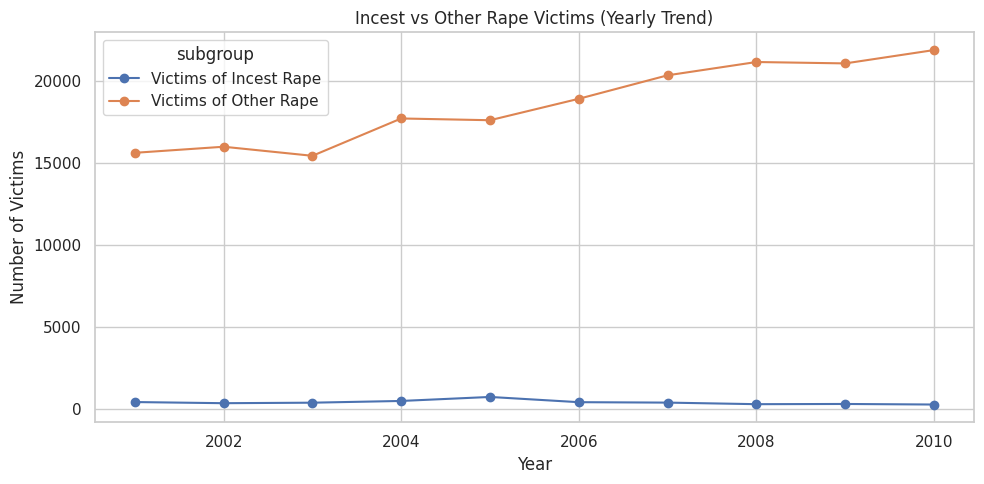

In [83]:
# Filter only two subgroups
types_df = df_rape[df_rape['subgroup'].isin(['Victims of Incest Rape', 'Victims of Other Rape'])]

# Group and pivot
type_trend = types_df.groupby(['year', 'subgroup'])['victims_of_rape_total'].sum().unstack()

# Plot
type_trend.plot(marker='o', figsize=(10, 5))
plt.title("Incest vs Other Rape Victims (Yearly Trend)")
plt.xlabel("Year")
plt.ylabel("Number of Victims")
plt.grid(True)
plt.tight_layout()
plt.show()


## Most Volatile States (YoY Change in Victim Counts)

This analysis identifies which states show the most inconsistent or volatile reporting trends of rape victims year-over-year. This may reflect sudden policy changes, improved reporting, or systemic underreporting.


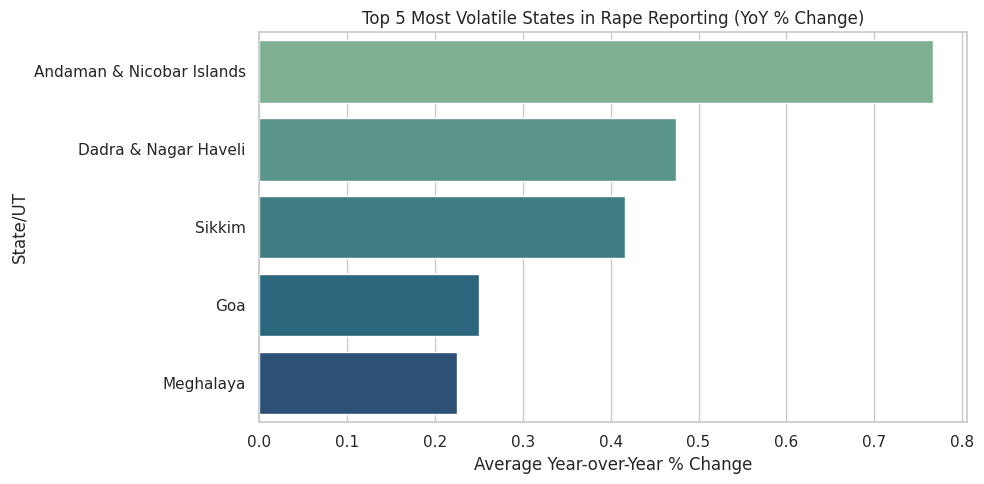

In [84]:
# Pivot by year and state
pivot_state_year = rape_total.pivot_table(
    index='year', columns='area_name', values='victims_of_rape_total', aggfunc='sum'
)

# Year-over-Year % change and mean of changes
yoy_change = pivot_state_year.pct_change().mean(axis=0).sort_values(ascending=False)

# Clean infinite values
yoy_change_cleaned = yoy_change.replace([float('inf'), -float('inf')], pd.NA).dropna()

# Top 5 most volatile states
top_volatile_states = yoy_change_cleaned.head(5)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_volatile_states.values, y=top_volatile_states.index, palette='crest')
plt.title("Top 5 Most Volatile States in Rape Reporting (YoY % Change)")
plt.xlabel("Average Year-over-Year % Change")
plt.ylabel("State/UT")
plt.tight_layout()
plt.show()


## Correlation Between Victim Age Groups

We examine whether trends in one age group correlate with others. A strong correlation might indicate structural or systemic patterns.


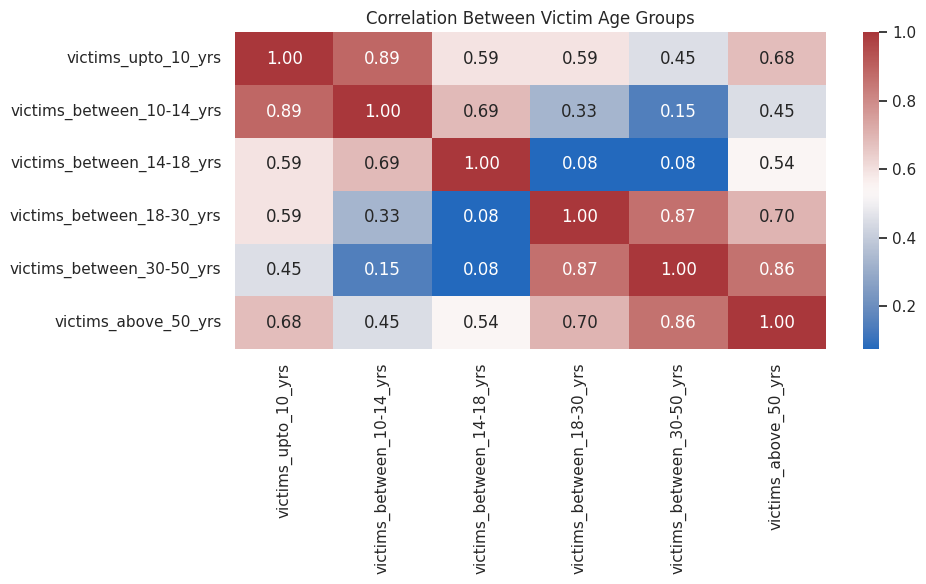

In [85]:
# Group by year and sum age groups
age_columns = [
    'victims_upto_10_yrs', 'victims_between_10-14_yrs',
    'victims_between_14-18_yrs', 'victims_between_18-30_yrs',
    'victims_between_30-50_yrs', 'victims_above_50_yrs'
]

age_df = rape_total.groupby('year')[age_columns].sum()

# Correlation matrix
corr = age_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='vlag', fmt=".2f")
plt.title("Correlation Between Victim Age Groups")
plt.tight_layout()
plt.show()


## Age Vulnerability Comparison by Region (Faceted View)

This visualization compares the vulnerability across different age groups in multiple states using small multiple line plots.


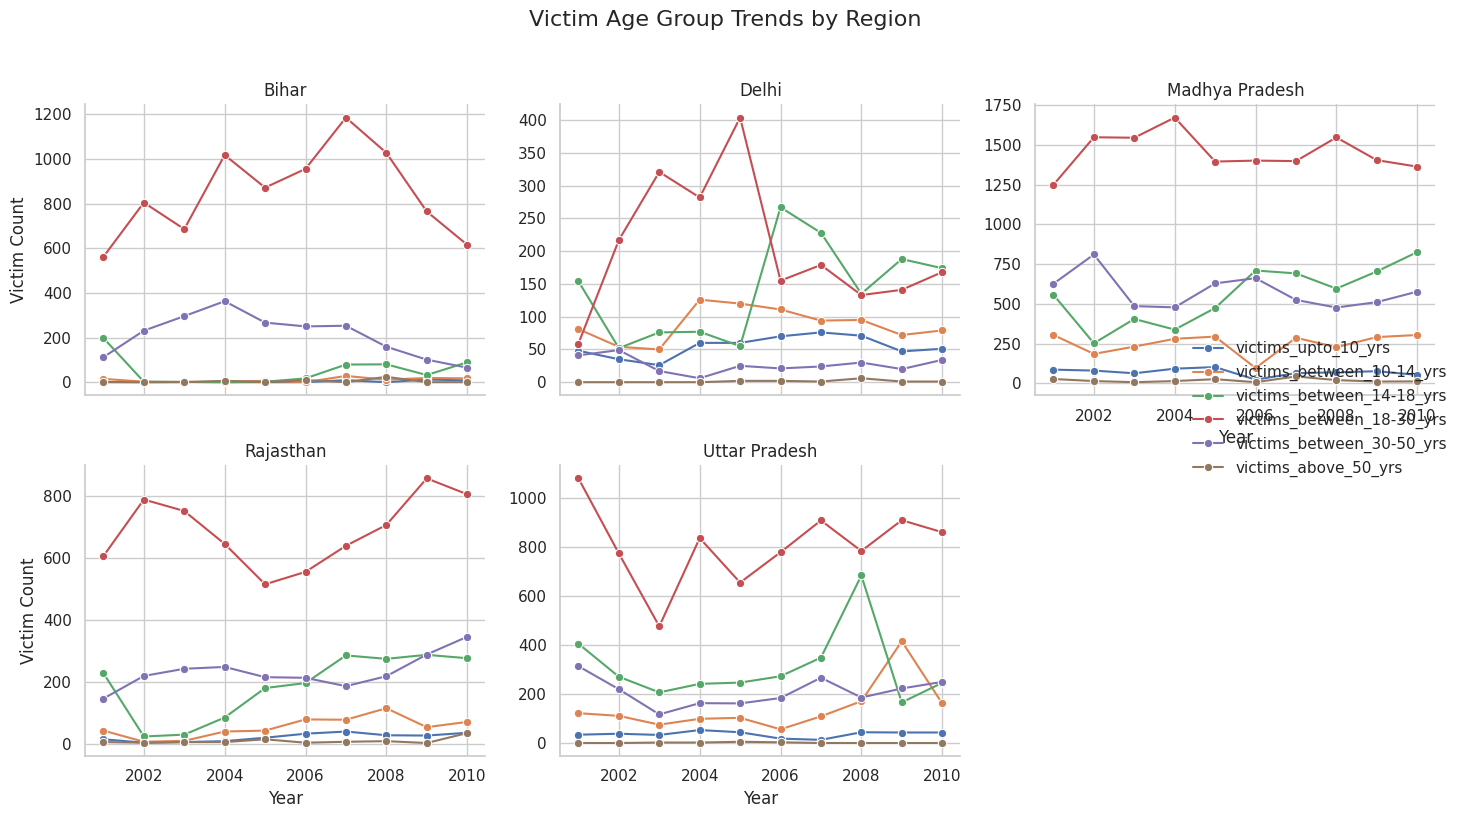

In [86]:
# Filter for a few states for comparison
selected_states = ['Madhya Pradesh', 'Rajasthan', 'Uttar Pradesh', 'Delhi', 'Bihar']
subset = rape_total[rape_total['area_name'].isin(selected_states)]

# Melt data for seaborn facet grid
melted = subset.melt(
    id_vars=['year', 'area_name'],
    value_vars=age_columns,
    var_name='age_group',
    value_name='victim_count'
)

# Create FacetGrid
g = sns.FacetGrid(melted, col='area_name', col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.lineplot, x='year', y='victim_count', hue='age_group', marker='o')
g.add_legend()
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Victim Count")
plt.suptitle("Victim Age Group Trends by Region", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


## Summary: Rape Victim Analysis (India)

This notebook presents an extensive analysis of rape victim statistics in India based on demographic and regional breakdowns. The dataset covers:

- **Temporal Trends**: National rise and fall in rape victim counts year-over-year.
- **Age Vulnerability**: Women aged **18–30 years** represent the most vulnerable group, followed by **30–50 years** and **14–18 years**, together accounting for over 80% of reported cases.
- **Regional Distribution**: States like **Madhya Pradesh, Rajasthan, Uttar Pradesh, Delhi, and Bihar** report the highest counts consistently.
- **Rape Type Dynamics**: Comparison between incest and non-incest rape reveals that the majority of cases are non-incest, although incest cases also show concerning trends.
- **State Volatility**: States such as **Dadra & Nagar Haveli**, **Chandigarh**, and **Goa** exhibit the most erratic year-over-year changes in reporting, which may reflect improvements in reporting mechanisms or societal pressure.
- **Correlation Analysis**: Victim counts across age groups show high correlation, indicating systemic demographic trends in targeting.
- **Faceted Analysis**: Regional comparison using small multiples visually demonstrates distinct victim patterns per age group across states.

This analysis provides a holistic view to support data-driven discussions on gender-based violence, victim protection, state performance, and policy effectiveness.


# **5. Property Theft & Recovery Analysis in India**

This notebook presents a comprehensive analysis of property-related crimes across Indian states and union territories from 2001 onwards. It focuses on:
- Theft incidents (number and value)
- Recovery effectiveness
- State-wise comparison
- Temporal trends and ratios
- Advanced insights using visual and statistical techniques

The goal is to derive actionable insights that help inform law enforcement policy, resource allocation, and crime prevention strategies.
**bold text**

### Load, Preview, and Clean the Dataset

We begin by importing the dataset containing records of property stolen and recovered across Indian states and union territories. The column names are cleaned for consistency by converting to lowercase, removing whitespace, and replacing spaces/newlines with underscores. Missing values are also identified to assess data quality.



In [87]:
#  Import the dataset while skipping malformed rows
df = pd.read_csv('Property_stolen_and_recovered.csv', on_bad_lines='skip')

#  Preview the top records
display(df.head())

#  Clean column names: make them lowercase, strip spaces, and replace spaces/newlines with underscores
df.columns = df.columns.str.strip().str.replace('\n', ' ').str.replace(' ', '_').str.lower()

#  Show cleaned column names
print("Cleaned Column Names:\n", df.columns.tolist())

#  Check for missing values
print("\n Missing values per column:\n", df.isnull().sum())


,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,Burglary - Property,3. Burglary,27,64,755858,1321961
1,Andhra Pradesh,2001,Burglary - Property,3. Burglary,3321,7134,51483437,147019348
2,Arunachal Pradesh,2001,Burglary - Property,3. Burglary,66,248,825115,4931904
3,Assam,2001,Burglary - Property,3. Burglary,539,2423,3722850,21466955
4,Bihar,2001,Burglary - Property,3. Burglary,367,3231,2327135,17023937


Cleaned Column Names:
 ['area_name', 'year', 'group_name', 'sub_group_name', 'cases_property_recovered', 'cases_property_stolen', 'value_of_property_recovered', 'value_of_property_stolen']

 Missing values per column:
 area_name                      0
year                           0
group_name                     0
sub_group_name                 0
cases_property_recovered       0
cases_property_stolen          0
value_of_property_recovered    0
value_of_property_stolen       0
dtype: int64


### Dataset Structure and Summary

This block displays the shape of the dataset and provides a structural summary using `.info()`. It helps in understanding the number of records, column data types, and the presence of null values.


In [88]:
# Understand structure and datatypes
print("Shape:", df.shape)
df.info()


Shape: (2449, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2449 entries, 0 to 2448
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   area_name                    2449 non-null   object
 1   year                         2449 non-null   int64 
 2   group_name                   2449 non-null   object
 3   sub_group_name               2449 non-null   object
 4   cases_property_recovered     2449 non-null   int64 
 5   cases_property_stolen        2449 non-null   int64 
 6   value_of_property_recovered  2449 non-null   int64 
 7   value_of_property_stolen     2449 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 153.2+ KB


###Total Property Stolen and Recovered Over Time

Here, we analyze national-level annual trends in the total value of property stolen and recovered. The plot highlights how both these values have evolved over the years, revealing the gap between criminal activity and successful recovery efforts.


<Figure size 1200x600 with 0 Axes>

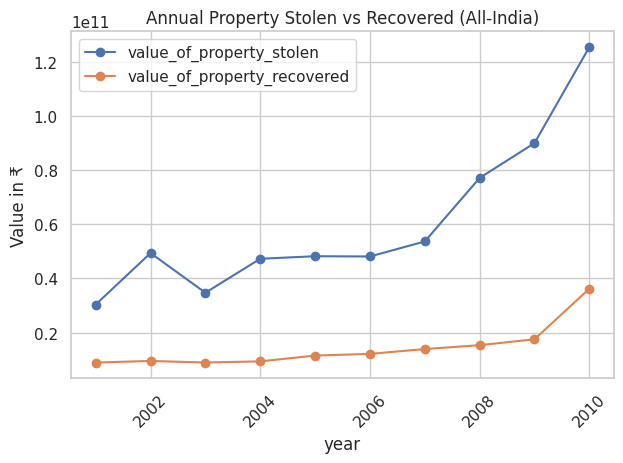

In [89]:
#  Group by year with correct column names
annual = df.groupby('year')[['value_of_property_stolen', 'value_of_property_recovered']].sum()

#  Plot trends
plt.figure(figsize=(12, 6))
annual.plot(marker='o')
plt.title('Annual Property Stolen vs Recovered (All-India)')
plt.ylabel('Value in ₹')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Step 4: National Property Recovery Rate Trend

This section calculates and visualizes the recovery rate as a percentage of property recovered versus stolen each year. It is a key metric to assess the efficiency of law enforcement and the justice system in recovering lost property.


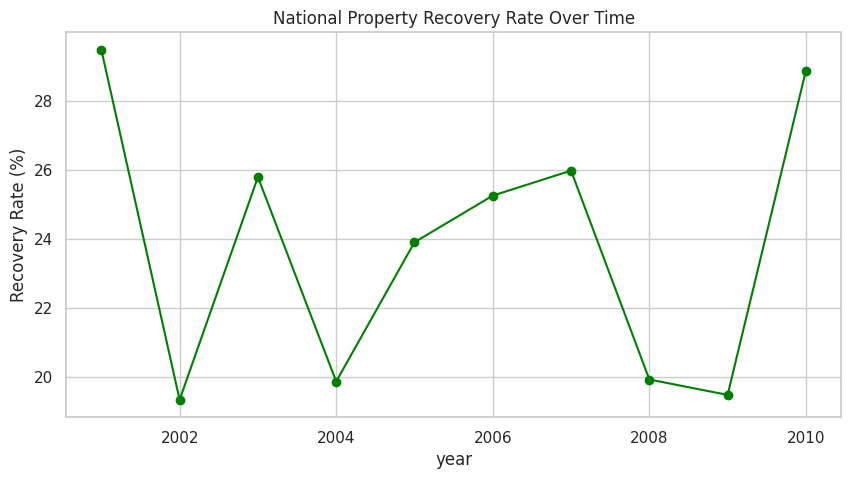

In [90]:
#  Compute national recovery rate
annual['recovery_rate_%'] = (annual['value_of_property_recovered'] / annual['value_of_property_stolen']) * 100

#  Plot
plt.figure(figsize=(10, 5))
annual['recovery_rate_%'].plot(marker='o', color='green')
plt.title('National Property Recovery Rate Over Time')
plt.ylabel('Recovery Rate (%)')
plt.grid(True)
plt.show()


## Most Targeted Property Categories (By Value)

We group data by property type and calculate the total value stolen for each category. This bar chart highlights which types of property are most frequently targeted by criminals, helping identify vulnerable sectors.


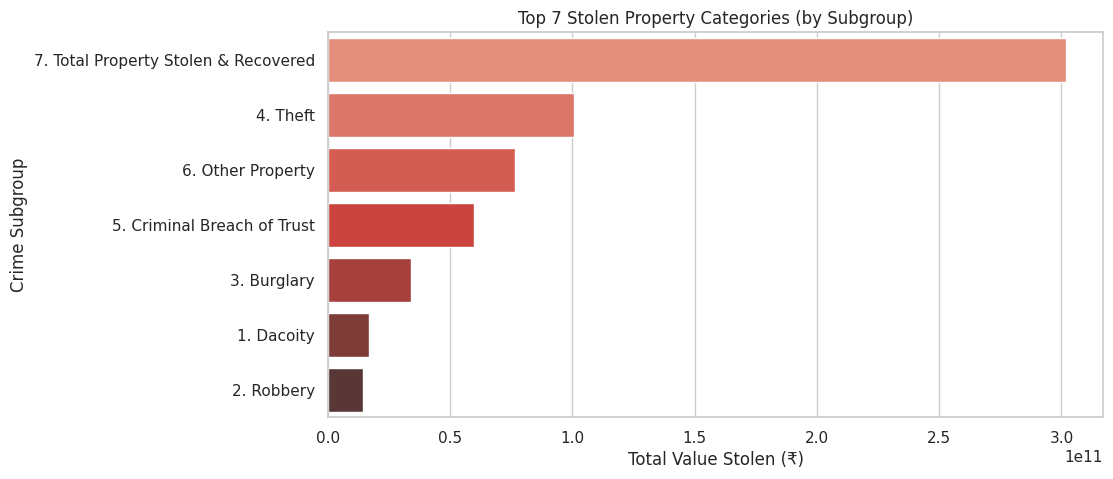

In [91]:
top_types = df.groupby('sub_group_name')['value_of_property_stolen'].sum().sort_values(ascending=False).head(7)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_types.values, y=top_types.index, palette='Reds_d')
plt.title('Top 7 Stolen Property Categories (by Subgroup)')
plt.xlabel('Total Value Stolen (₹)')
plt.ylabel('Crime Subgroup')
plt.show()


### Recovery Efficiency by Property Type

By comparing stolen and recovered values for each property type, we compute the recovery rate per category. The top 10 property types with the highest recovery rates are visualized, offering insights into which types are easier or harder to retrieve.


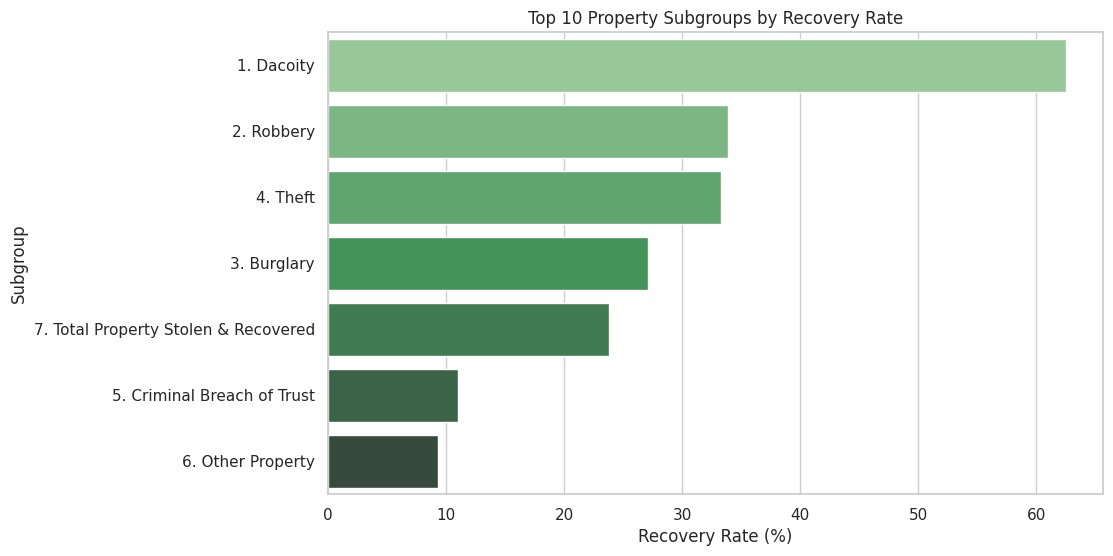

In [92]:
recovery_by_type = df.groupby('sub_group_name')[
    ['value_of_property_stolen', 'value_of_property_recovered']
].sum()
recovery_by_type['recovery_rate_%'] = (
    recovery_by_type['value_of_property_recovered'] / recovery_by_type['value_of_property_stolen']
) * 100

top_recovery = recovery_by_type.sort_values('recovery_rate_%', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_recovery['recovery_rate_%'], y=top_recovery.index, palette='Greens_d')
plt.title('Top 10 Property Subgroups by Recovery Rate')
plt.xlabel('Recovery Rate (%)')
plt.ylabel('Subgroup')
plt.show()


### State-Wise Theft in the Latest Year

This step focuses on the most recent year and shows which states reported the highest total value of stolen property. This geographic analysis helps pinpoint high-risk regions needing more preventive or recovery efforts.


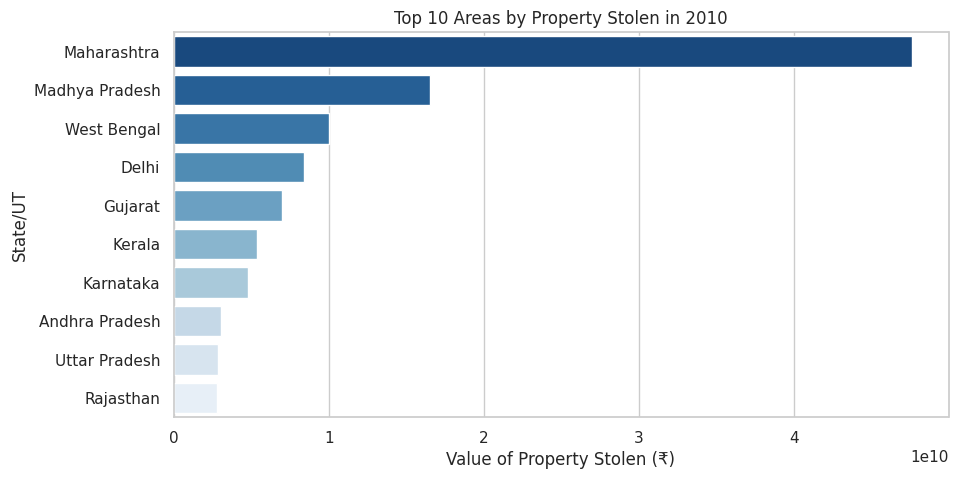

In [93]:
latest_year = df['year'].max()
statewise_latest = df[df['year'] == latest_year].groupby('area_name')['value_of_property_stolen'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=statewise_latest.values, y=statewise_latest.index, palette='Blues_r')
plt.title(f'Top 10 Areas by Property Stolen in {latest_year}')
plt.xlabel('Value of Property Stolen (₹)')
plt.ylabel('State/UT')
plt.show()


### Forecasting Property Theft for Next Year

Using linear regression on the annual stolen property values, we forecast the expected total value of property theft for the upcoming year. This prediction can aid in budgeting for preventive measures and law enforcement planning.


In [94]:
#  Prepare data for regression model
X = np.array(annual.index).reshape(-1, 1)
y = annual['value_of_property_stolen'].values  # ✅ use the correct column name

#  Fit linear regression
model = LinearRegression()
model.fit(X, y)

#  Predict for next year
next_year = X[-1][0] + 1
predicted_value = model.predict([[next_year]])

#  Output prediction
print(f" Predicted Value of Property Stolen in {next_year}: ₹{int(predicted_value[0]):,}")



 Predicted Value of Property Stolen in 2011: ₹106,030,555,229


###Final Summary and Key Takeaways

This final section highlights major takeaways from the analysis, including:
- Time span of the data,
- Overall trends,
- Average national recovery efficiency,
- Most vulnerable property types,
- High-risk states, and
- Forecasted crime levels.

These insights can inform smarter resource allocation, strategic interventions, and future research.
